In [11]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [28]:
#loading data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#reshaping data
# X_train[0].shape # 28x28
# X_train[0][0].shape # 28
# X_train.shape[0] = 60000
# X_train.shape[1] = X_train.shape[2] = 28

# I assume that the last dimension is added because we are only interested
# in gray scale not rgb
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) # adding another dimension, every pixel value is for now [i] 
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

#checking the shape after reshaping
print(X_train.shape)

#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)


In [32]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D(2,2), #adding pooling layer
    Flatten(), #reduces the input data into a single dimension instead of 2 
    # it is a connection between convolutional and dense layers
    Dense(100,activation='relu'),#adding fully connected layer
    Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
#model.fit(X_train,y_train,epochs=10)
model.fit(X_train,y_train,epochs=2)

Epoch 1/2
   4/1875 [..............................] - ETA: 39s - loss: 0.0170 - accuracy: 1.0000

2022-11-11 16:22:49.976209: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 33s 17ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 2/2
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0178 - accuracy: 0.9942


In [49]:
#evaluting the model
model.evaluate(X_test,y_test)
#predictions
predictions = model.predict([X_test])

313/313 [==============================] - 2s 5ms/step


7

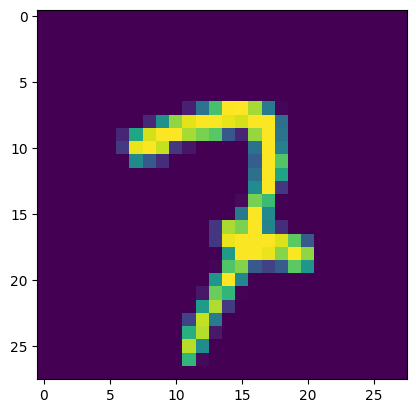

In [50]:
import random
from matplotlib import pyplot as plt
benchmark = random.randint(0,len(predictions)-1)
plt.imshow(X_test[benchmark])
np.argmax(predictions[benchmark])

In [51]:
model.save('cnn_model.h5')